# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import sklearn.linear_model
import seaborn as sns

In [14]:
x_values= [17,51,27,21,36,48,19,26,54,30]
y_values= [10,1,5,9,4,2,9,6,0,3]

In [15]:
# Your code here. 
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

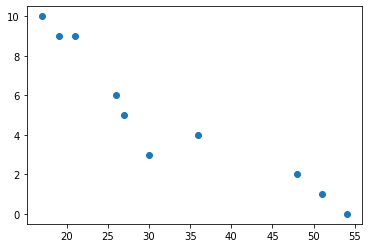

In [16]:
# Your code here.
plt.scatter(x_values,y_values)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?


**The slope is negative so the more age the less tardies.**

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Your response here.
np. cov(x_values,y_values) 

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Covariance between the two sets is -45.567. Since it is negative we can tell as one grows the other decreases. 

In [20]:

corr, _ = pearsonr(x_values,y_values)
corr

-0.939162688688712

correlation between these two sets is very strong and negative. So the more of one the less of the other. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [28]:
x_v=np.array([17,51,27,21,36,48,19,26,54,30]).reshape(-1, 1)
y_v=np.array([10,1,5,9,4,2,9,6,0,3]).reshape(-1, 1)

In [68]:
# Your response here.
reg=sklearn.linear_model.LinearRegression().fit(x_v,y_v)
slope=reg.coef_
y_intercept=reg.intercept_
print(slope)
print(y_intercept)

[[-0.24282077]]
[12.88880336]


In [69]:
def regmodel(x):
    y=(slope*x)+y_intersept
    return y
    

In [78]:
predicted=regmodel(x_v)
predicted

array([[ 8.76085026],
       [ 0.50494405],
       [ 6.33264255],
       [ 7.78956717],
       [ 4.14725561],
       [ 1.23340636],
       [ 8.27520872],
       [ 6.57546332],
       [-0.22351827],
       [ 5.60418024]])

**My outcome variable will be tardies. I used a Linear regression model built with least squares.**

Plot your regression model on your scatter plot.

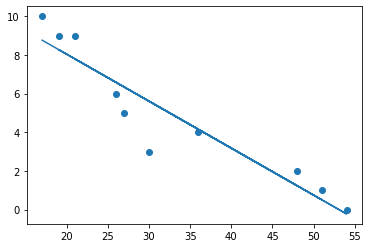

In [80]:
# Your code here.
plt.scatter(x_values,y_values)
plt.plot(x_v,predicted)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
Negative, very confident, yes good predictor. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [82]:
# Import any libraries you may need & the data
vehicles=pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [86]:
# Your response here. 
v_analysis=vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
v_analysis.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [134]:
v_analysis.corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False).reset_index()

,index,CO2 Emission Grams/Mile
0,CO2 Emission Grams/Mile,1.000000
1,Fuel Barrels/Year,0.986189
2,Fuel Cost/Year,0.930865
3,Cylinders,0.752393
4,Year,-0.222300
5,Combined MPG,-0.926229


**Fuel Barrel/Year seems to be the most correlated to CO2 Emissions and Year the least correlated. The more correlation there is(the absolute value of the correlation), the more importance there seems to be in determining the outcome.** 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

### SKIP TO THE SUMMARY

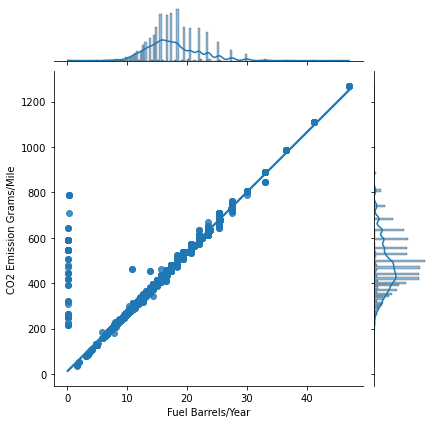

In [159]:
sns.jointplot(x='Fuel Barrels/Year', y='CO2 Emission Grams/Mile',data=v_analysis, kind='reg')

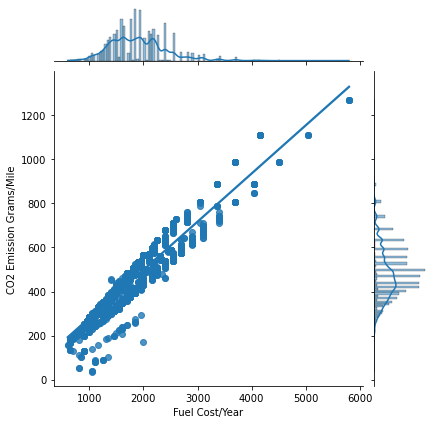

In [160]:
sns.jointplot(x='Fuel Cost/Year', y='CO2 Emission Grams/Mile',data=v_analysis, kind='reg')

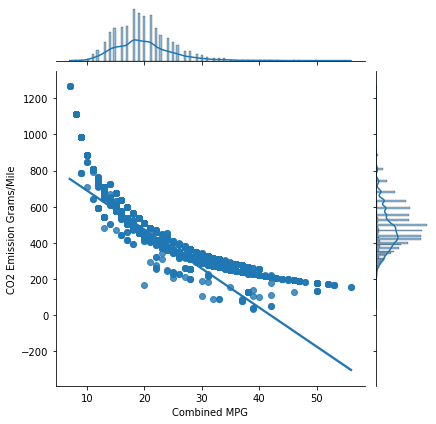

In [161]:
sns.jointplot(x='Combined MPG', y='CO2 Emission Grams/Mile',data=v_analysis, kind='reg')

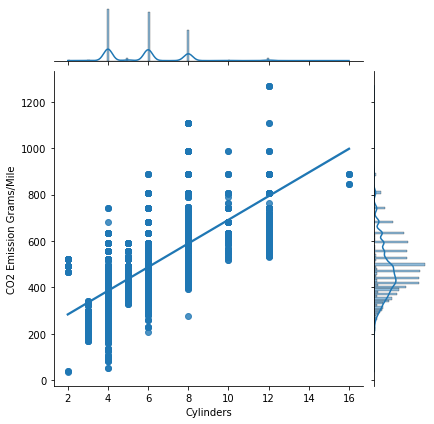

In [162]:
sns.jointplot(x='Cylinders', y='CO2 Emission Grams/Mile',data=v_analysis, kind='reg')

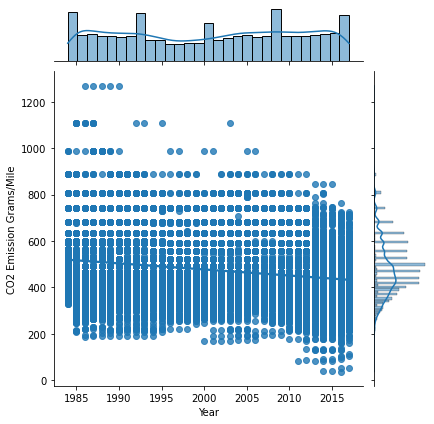

In [163]:
sns.jointplot(x='Year', y='CO2 Emission Grams/Mile',data=v_analysis, kind='reg')

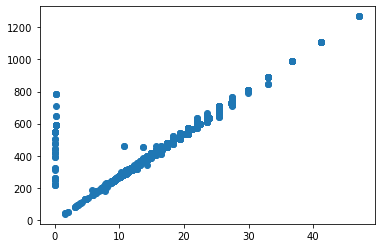

In [135]:
# Your response here. 
plt.scatter(v_analysis['Fuel Barrels/Year'],v_analysis['CO2 Emission Grams/Mile'])

In [136]:
xvaluesv=np.array(v_analysis['Fuel Barrels/Year']).reshape(-1,1)
yvaluesv=np.array(v_analysis['CO2 Emission Grams/Mile']).reshape(-1,1)

In [138]:
regv=sklearn.linear_model.LinearRegression().fit(xvaluesv,yvaluesv)  

In [139]:
def reglinV(x):
    return (regv.coef_)*x-regv.intercept_
    

In [140]:
new_y_v=reglinV(xvaluesv)

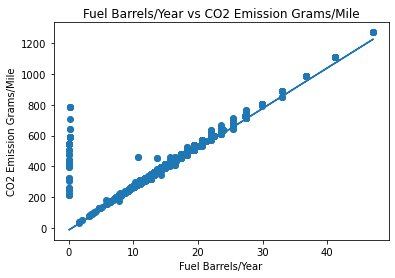

In [143]:
plt.scatter(xvaluesv,yvaluesv)
plt.plot(xvaluesv,new_y_v)
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.title('Fuel Barrels/Year vs CO2 Emission Grams/Mile')
plt.show()

### THIS IS THE SUMMARY PART

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [166]:
import statsmodels.api as sm
yvehicles = v_analysis['CO2 Emission Grams/Mile']

#define predictor variables
xvehicles = v_analysis[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

#add constant to predictor variables
xvehicles = sm.add_constant(xvehicles)

#fit linear regression model
model = sm.OLS(yvehicles, xvehicles).fit()

#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                             13:46:18   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Our test has an r sqaured of .981 which indicates it is a very strong model. By observing the STD ERROR we can conclude that the most importamt variable is Fuel Cost/Year.**

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [98]:
# Your code here. 
xvalues= np.array([1,3,4,6,8,9,11,14]).reshape(-1,1)
yvalues= np.array([1,2,4,4,5,7,8,13]).reshape(-1,1)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [118]:
reg2=sklearn.linear_model.LinearRegression().fit(xvalues,yvalues)   

In [188]:
def reglin2(x):
    return (reg2.coef_)*x+reg2.intercept_
    

In [189]:
new_yvalues=reglin2(xvalues)

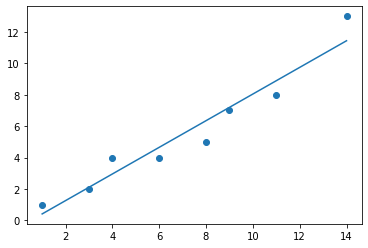

In [190]:
# Your code here.
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,new_yvalues)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

 
**positive and possibly strong correlation**

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [184]:
# Your response here. 
xvaluesB= np.array([1,3,4,6,8,9,11]).reshape(-1,1)
yvaluesB= np.array([1,2,4,4,5,7,8]).reshape(-1,1)
reg3=sklearn.linear_model.LinearRegression().fit(xvaluesB,yvaluesB)   

In [185]:
def reglin3(x):
    return (reg3.coef_)*x+reg3.intercept_

In [186]:
new_yvalues3=reglin3(xvaluesB)

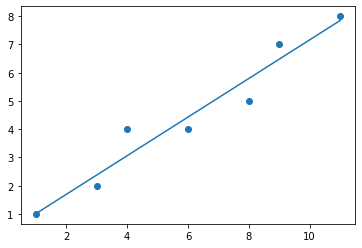

In [187]:
plt.scatter(xvaluesB,yvaluesB)
plt.plot(xvaluesB,new_yvalues3)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?


**The model after removing the outlier seems to be more faithful or closer to the actual data.It describes the data better**